# Chapter 6: Numpy and Rasterio

## Reading Raster Data into Numpy Array and Visualizing using Matplotlib

**Author: Dr. Suborna Ahmed**

## <span style="color:blue"> Learning Objectives:</span>  

* **Numerical computing using NumPy:** 
    * Array 
    * Link Many Libraries
    * Random Number Generation
    * Slicing Array
    * Math Operations
    * Handle Different Size Arrays


* **Linking Matplotlib, Numpy and Rasterio:** 

    * Importers & Exporters
    * GDAL:Geospatial Abstraction Library
    * Rasterio Library
    * Open and Visualize data 
    * Add Color Ramp
    * Data Property
    * Reading All Bands and Plot
    * Plot Bands Separately
    * Saving Bands in a Directory


* **Examples Similar to Lab 6**    

## 1. Numpy Basics

* Python was not initially designed to work with numerical computing, but attracted a lot of interest from the scientific community. Sure enough, specialty group interested in numerical computing and arrays in python forms. After some development, multiple packages, many revisions, some infighting, project leads leaving, user suggestions, and 8 years, then there was NUMPY. It's a short form for Numerical Python.

* We only need to install NumPy on a Python IDE. [PIP or CONDA can be used to install NumPy.](https://numpy.org/install/)

* In NumPy we work on N-dimensional array and can add multiple numerical datatypes. There are many functions for manipulating and analyzing arrays. Some are implemented in C, so occasionally faster than pure Python!

NumPy website: [More information on NumPy](https://numpy.org/)<br>

### 1.1. NumPy Array

NumPy is a powerful library for numerical computing in Python, and its `array` object, known as `numpy.ndarray`, is at the core of its functionality. NumPy arrays provide a fast and efficient way to handle large datasets and perform various mathematical operations. A numpy array is a grid of values of all of the same data type and it is indexed by a tuple of nonnegative integers.
 
**Dimension:** The number of dimensions is the rank of the array.

**Shape of an Array:** The shape of an array is a tuple of integers, giving the size of the array along each dimension.

**Properties of Arrays:** 
* shape: reports the shape
* dtype:  reports the data type of elements

#### 1.1.1. Install Libraries
The following libraries should be installed using miniconda to import here.

In [1]:
import rasterio
import numpy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from rasterio.plot import show

#### 1.1.2. Introduction to N-dimentional Arrayrs

The following codes provide examples that give a quick overview of NumPy arrays and demonstrate essential attributes used to describe and analyze arrays. 

The first example creates a NumPy array named 'ok' with the elements [1, 2, 3, 4]. It showcases how to create a NumPy array using the `np.array()` function, which is a fundamental operation when working with NumPy.
<br>
Then the example uses the print() function to display important information about the 'ok' NumPy array:
- "ok.shape = (4,)": indicates that the array has 4 elements along the first dimension, making it a one-dimensional array.
- "ok.dtype = int64": shows that the array contains 64-bit integers.
- "ok.ndim = 1": indicates that the array is one-dimensional.
- "ok.size = 4": shows the total number of elements in the 'ok' array.

In [2]:
ok = np.array([1, 2, 3, 4])

print("ok =", ok, "\n",
"ok.shape =", ok.shape,"\n"
"ok.dtype =", ok.dtype,"\n",
"ok.ndim =", ok.ndim,"\n",
"ok.size =", ok.size)

ok = [1 2 3 4] 
 ok.shape = (4,) 
ok.dtype = int64 
 ok.ndim = 1 
 ok.size = 4


The second example below creates an array of floats. 
<br>
The `np.arange()` function is similar to Python's built-in `range()` function, but it returns an array and can handle float numbers. <br>Here it's creating an array starting at 0, ending just before 10, with a step size of 0.1. So it will include floating numbers like 0.0, 0.1...,etc.

In [3]:
# float array
ok2 = np.arange(0,10,0.1) #float list! range of values
dt= ok2.dtype
ndm= ok2.ndim 
print("ok2=", ok2,"\n", "dtype=", dt, "\n", "ndim=",ndm, "\n", "size=", ok2.size)

ok2= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9] 
 dtype= float64 
 ndim= 1 
 size= 100


**In NumPy, arrays can have any number of dimensions. This number is defined by the shape of the array, and it could be 1-D (one-dimensional), 2-D (two-dimensional), or n-D (n-dimensional), where n is any number greater than 2.**

- **1-D Array**: the simplest form of a NumPy array. It represents a linear collection of elements, similar to a list in Python, and can be created using a single list.

A 1-D array with 5 elements:

![1d_array-2.png](Week9_img/1d_array.png)

In [4]:
array_1d = np.array([1, 2, 3, 4, 5])
array_1d

array([1, 2, 3, 4, 5])

- **2-D Array** or a matrix: is a collection of elements arranged in rows and columns. It can be created using a list of lists, where each inner list represents a row.

A 2-D array with 3 rows and 3 columns:

![2d_array.png](Week9_img/2d_array.png)

In [5]:
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
array_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

- **Multiple Dimension Array (n-D Array)**: often used in more complex computations. They can be created using nested lists, with each level of nesting representing a new dimension.

A 3-D array with 2 'layers', each containing 2 rows and 3 columns:
![3d_array.png](Week9_img/3d_array.png)

In [6]:
array_nd = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
array_nd

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

#### 1.1.3. How to Create an Array

* Create a list of **integers** and make it a **1-dimensional** array:

In [7]:
ok = np.array([1,2,3])
ok

array([1, 2, 3])

* Create a list of **float** and make it a **1-dimensional** array:

In [8]:
ok2 = np.arange(0, 10, 0.1)
ok2

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

* Create a 2-D array with only 0s: <code>np.zeros((r,c))</code>
    - r = rows
    - c = columns

In [9]:
# np.zeros((r,c)) #array with only 0s
t1=(2,2)
np.zeros(t1)

array([[0., 0.],
       [0., 0.]])

* Create a 2-D array with only 1s: <code>np.ones((r,c))</code>
    - r = rows
    - c = columns

In [10]:
# np.ones((r,c))# array with only 1s
print(np.ones(t1))

[[1. 1.]
 [1. 1.]]


* Create a 2-D array full of X only: <code>np.full((r,c),X)</code>
    - r = rows
    - c = columns

In [11]:
# array full of 8: np.full((r,c),8)
print(np.full((2,2), 8))

[[8 8]
 [8 8]]


`````{admonition} reshape() function:
:class: tip
             
**Reshaping in NumPy is a fundamental operation that changes the shape (i.e., the number of rows and columns) of an array without changing its data.**
    
The general syntax is:
`numpy_array.reshape(new_shape)`
``````

In [12]:
# Create a 1D numpy array
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
# Reshape the array to a 2D array with 5 rows and 2 columns
reshaped_arr = arr.reshape((5, 2))

reshaped_arr

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

### 1.2. Random Numbers in NumPy

Random numbers are frequently used in scientific computing for various purposes such as generating data samples, random assignments, and more. 
<br>
NumPy, a powerful library in Python, provides a rich and efficient set of functions to generate random numbers. These functions are part of the `numpy.random` module. The random numbers can be generated from various distributions, including uniform, normal (Gaussian), and others. Additionally, NumPy provides the ability to generate arrays of random numbers in a given shape, adding further flexibility.

NumPy's random number functions include:

- np.random.rand(): Generates **uniformly distributed** numbers between 0 and 1.
- np.random.randn(): Generates numbers from the **standard normal distribution**.
- np.random.randint(): Generates random integers **within a specified range**.
- np.random.seed(): Sets the seed for the random number generator for **reproducibility**.

Remember, while random numbers can introduce necessary variability, they can also lead to inconsistent results. Setting a seed (np.random.seed()) can ensure reproducibility for randomly generated data. 

Reference: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

- `np.random.rand(n)`: Generates n uniformly distributed random numbers between 0 and 1.

In [14]:
# 5 random numbers: range is 0 to 1
np.random.rand(5) # generates an array of five random numbers between 0 and 1.

array([0.52314682, 0.91634317, 0.93216445, 0.75270922, 0.04092002])

- `np.random.randn(n)`: Generates n random numbers from the **standard normal distribution (mean 0 and variance 1)**.

In [15]:
np.random.randn(7) # generates an array of seven random numbers from the standard normal distribution.

array([ 0.63290376, -0.15806693,  0.32689421, -2.86363896, -0.2398887 ,
       -0.47365752, -0.0596955 ])

- `np.random.randint((low, high, size))`

In [16]:
# # 10 random numbers between 0 and 4
b1=np.random.randint(0, 5, size=10)
print(b1)
print(b1.dtype)

[3 4 1 2 3 0 0 4 4 3]
int64


In [17]:
# 10 random numbers between 0 and 1
np.random.randint(2, size=10)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [18]:
# 20 random numbers between 0 and 2
np.random.randint(3, size=20)

array([2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0])

"size=(3,5)": creates a 2-D dimensional array with 3 rows and 5 columns

In [19]:
# 3*5 random numbers between 0 and 2
nn21= np.random.randint(3, size=(3,5))
print(nn21, "\n", "dimension=",nn21.ndim)

[[1 2 2 1 2]
 [0 1 0 1 1]
 [0 2 2 1 0]] 
 dimension= 2


In [20]:
# Slice and dice: random.random_integers(low, high, size)
# size = 2 rows 4 columns
# numbers between 0 and 9
h=np.random.randint(0,10,(2,4)) 
print(h)

[[8 6 7 1]
 [6 7 0 7]]


`````{admonition} Note
:class: tip

    Each time a new array will be produced when you re-run the codes above.<br>
    To make it reproducible, you need to set <code>seed</code>.
    
``````

When you re-run the code below, the array will stay the same.

In [21]:
np.random.seed(0)
np.random.rand(5)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ])

### 1.3. Numpy Slicing

Slicing is an operation in Python that allows you to extract a portion of a sequence, such as a list or an array. NumPy slicing is a way of accessing, modifying, or extracting subarrays, rows, columns, or individual elements from the original NumPy array. 

To slice a NumPy array, you can use the colon (:) operator, which separates the start index, stop index, and step value. The syntax is similar to regular Python list slicing, but it extends to multiple dimensions in the case of NumPy arrays. Or you can specicfy the row and column number for multiple dimension arrays.

<span style="color:red">**NOTE: Python always uses 0-based indexing!**</span>

First we create a 2-D array and print out:

In [22]:
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

To access the second row, we can use:

In [23]:
print(arr_2d[1])

[4 5 6]


To access the second column, we can use:

In [24]:
print(arr_2d[: ,1])

[2 5 8]


To access the specific element, 6 (at the 2nd row and 3rd column), in the 2-D array, we can use:

In [25]:
print(arr_2d[1, 2])

6


We can also use this method to modify specific elements in the array:

In [26]:
arr_2d[0, 0] = 9  # change the element in the 1st row and 1st column of array to 9
arr_2d[1, 0] = 23 # change the element in the 2nd row and 1st column of array to 23
arr_2d[0, 1] = 45 # change the element in the 1st row and 2nd column of array to 45
arr_2d

array([[ 9, 45,  3],
       [23,  5,  6],
       [ 7,  8,  9]])

To access a subarray or slice, we can use the colon (:) operator:

In [27]:
print(arr_2d[0:2, 1:3])

[[45  3]
 [ 5  6]]


In this example above: "0:2" specifies the first through the second row (up to, but not including, row 2); and "1:3" specifies the second through the third column (up to, but not including, column 3). Thus the four element at the top right are selected.

Using the colon (:) operator, we can slice a 1-D array with similar syntax as slicing a list: `arr[start_index: end_index: step]`:
<br>
With 2-D array, the general syntax is: `arr[start_row:end_row:step_row, start_col:end_col:step_col]`

Example with 1-D array:<br>
    Here it takes every second element in the array starting from index 1 and ending before index 7.

In [28]:
# Create a 1D numpy array
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(arr)

# Slice the array from index 1 to index 7 with step 2
slice_arr = arr[1:7:2]

print(slice_arr)

[0 1 2 3 4 5 6 7 8 9]
[1 3 5]


Example with 2-D array:<br>
Here, the first colon ind arr_2d[`:`, 1::2] selects all rows.<br>
And the part after the comma(,) arr_2d[:, `::2`] means start at column index 0 (the first column), and end at the last column, with step by 2.

In [29]:
# Create a 2D numpy array
arr_2d = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]])
print(arr_2d)

# Slice the array: all rows and from the 1st column to the last with step 2
slice_arr_2d = arr_2d[:, ::2]

print(slice_arr_2d)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  2]
 [ 3  5]
 [ 6  8]
 [ 9 11]]


More example with 2-D array slicing:<br>
"0:3": means start at row index 0 (the first row), and end at (excluding) the row index 3 (the third row), with step by 1.<br>
"0:4:2": means start at column index 0 (the first column), and end at (excluding) the last column (column index 4), with step by 2.

In [30]:
arr_2d = np.array([[0,  1,  2,  3,  4],
                   [5,  6,  7,  8,  9],
                   [10, 11, 12, 13, 14],
                   [15, 16, 17, 18, 19],
                   [20, 21, 22, 23, 24]])
arr_2d[0:3, 0:4:2]

array([[ 0,  2],
       [ 5,  7],
       [10, 12]])

```{admonition} Activity 1
<code>b = np.ones([4,2]) </code><br>
What would be the array <code>b</code> look like if we change as below: <br>
<code>b[:,1] =5</code>
``````

In [31]:
# Write your solution here


See [solution for activity 1](section-label-9.1) at the end.

```{admonition} Activity 2
Make a 3 rows and 4 columns array ranging from 12 - 24.
``````

In [32]:
# Write your solution here


See [solution for activity 2](section-label-9.2) at the end.

### 1.4. Numpy Math Operations
Basic math operations in numpy work on an element wise fashion. 

The math operations could be:
* <code>+</code> additions 
* <code>-</code> subtraction
* <code>x</code> multiplication
* <code>/</code> division, <code>//</code> floor division
* <code>** or ^</code> powers

Also available as functions: 
* <code>np.add()</code>
* <code>np.multiply()</code>
* <code>np.sum()</code>: sum of all elements (**optional axis arguement**)

`````{admonition} Note
:class: tip
The axes of an array describe the order of indexing into the array, <br>e.g. axis=0 refers to the first index coordinate, axis=1 the second. etc.

![axis.png](Week9_img/axis.png)
``````

In [33]:
# Create a 2D numpy array
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr_2d)

# Sum along axis 0 (i.e., sum the columns)
sum_axis_0 = np.sum(arr_2d, axis=0)

# Sum along axis 1 (i.e., sum the rows)
sum_axis_1 = np.sum(arr_2d, axis=1)

print("Sum along axis 0: ", sum_axis_0)
print("Sum along axis 1: ", sum_axis_1)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Sum along axis 0:  [12 15 18]
Sum along axis 1:  [ 6 15 24]


The example above created a 2D array and used the axis to get sum of each column and som of each row:<br>
[12 15 18] represents the sum of elements in each column of the array.<br>
[6 15 24] represents the sum of elements in each row of the array.

#### 1.4.1. Handle Different Size of Arrays
<code>x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])<br>
v = np.array([1, 0, 1])
</code>

If you want to add these, you would  need to make them the same size, but not with numpy.<br>
<code>y = x + v</code>  
In numpy it adds v to each row of x.
<code>
y=[[ 2  2  4]
   [ 5  5  7]
   [ 8  8 10]
   [11 11 13]]</code>

In [34]:
# adding two array
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v

print('x=',x,'\n','v= ',v,'\n','y=',y)

x= [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 
 v=  [1 0 1] 
 y= [[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [35]:
# same result as + operator
y1 = np.add(x,v)
print(y1)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [36]:
# adding element by element
np.add(x,y)

array([[ 3,  4,  7],
       [ 9, 10, 13],
       [15, 16, 19],
       [21, 22, 25]])

In [37]:
# Make a zeros array 3x3 with an integer data type!
q = np.zeros((3,3), dtype='int')
q

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [38]:
# Assign the middle pixel to 3
q[1, 1] = 3
q

array([[0, 0, 0],
       [0, 3, 0],
       [0, 0, 0]])

In [39]:
# Multiply by itself
q * q

array([[0, 0, 0],
       [0, 9, 0],
       [0, 0, 0]])

In [40]:
# Add it to itself
q + q

array([[0, 0, 0],
       [0, 6, 0],
       [0, 0, 0]])

In [41]:
# Subtract it from itself
q - q

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [42]:
# Divide it by itself – what happens
q / q # zero division problem

<ipython-input-42-a244abc5643d>:2: RuntimeWarning: invalid value encountered in true_divide
  q / q # zero division problem


array([[nan, nan, nan],
       [nan,  1., nan],
       [nan, nan, nan]])

```{admonition} Activity 3

1. Create a three 3x3 arrays with 1s, 0s, and 4s.
2. Add these three arrays
3. Combine them into one array
    
In the activity, I called the combined array as "f".<br>
Note: f array look like the following:
![f_array.PNG](Week9_img/f_array.PNG)

``````



In [43]:
# Write your solution here


See [solution for activity 3](section-label-9.3) at the end.

### 1.5. More Built in Functions to Explorer

1. **Array creation and manipulation:**

- Reshape(): This function gives a new shape to an array without changing its data.
- hstack(): This function is used to stack arrays in sequence horizontally (column-wise).
- vstack(): This function is used to stack arrays in sequence vertically (row-wise).
- dstack(): This function is used to stack arrays in sequence depth-wise (along the third dimension).

2. **Array read and write functions:**

- Array(): This function is used to create an array.
- loadtxt(): This function is used to load data from a text file.
- ones(): This function returns a new array of a given shape and type, filled with ones.
- zeros(): This function returns a new array of a given shape and type, filled with zeros.
- copy(): This function returns an array copy of the given object.
- empty(): This function creates a new array of a given shape and type, without initializing entries.

3. **Math functions:**

- square(): This function returns the element-wise square of the input.
- absolute(): This function calculates the absolute value element-wise.
- minimum(): This function returns the minimum of an array or minimum along an axis.
- maximum(): This function returns the maximum of an array or maximum along an axis.
- sum(): This function returns the sum of array elements over a given axis.

4. **Random sampling and number generation:**

- rand(): This function returns random values in a given shape.
- randint(): This function returns random integers from low (inclusive) to high (exclusive).
- sample(): This function returns random floats in the half-open interval [0.0, 1.0).

5. **Sorting, searching, counting:**

- sort(): This function returns a sorted copy of an array.
- nonzero(): This function returns the indices of the elements that are non-zero.
- where(): This function returns elements chosen from x or y depending on condition.

6. **Standard stats as built in:**

- std(): This function computes the standard deviation along the specified axis.
- mean(): This function computes the arithmetic mean along the specified axis.
- var(): This function computes the variance along the specified axis.
- max(): This function returns the maximum along a given axis.
- min(): This function returns the minimum of an array or minimum along an axis.
- median(): This function computes the median along the specified axis.
- histo(): This function computes the histogram of a set of data.

**Most of these functions can be used along a specified axis of the array, if the array is multi-dimensional.**

## 2. Linking Matplotlib, Numpy and Rasterio

Recall the previous chapter that we have talked about the **Matplotlib** and some **base colors**. In this chapter, we will introduce **Colormaps** in Python. 

Colormaps are used in visualizing data, which is useful when creating plots or images.

Colormaps in matplotlib can be categorized into several types:

- Sequential: These are used for representing information that has ordering (low to high or high to low).

- Diverging: These are used when the data being visualized deviates around a middle value. They often use two different colors that meet in the middle at an unsaturated color.

- Cyclic: These colormaps are used for representing data that's cyclical in nature.

- Qualitative: These colormaps are used for representing information that doesn't have any ordering or relationship. They are often a miscellaneous collection of colors.

* Example of color maps:

In [44]:
# pip install colorspacious
import numpy as np
import matplotlib as mpl
import matplotlib.cm
import matplotlib.pyplot as plt
from colorspacious import cspace_converter

In [45]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.cm.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

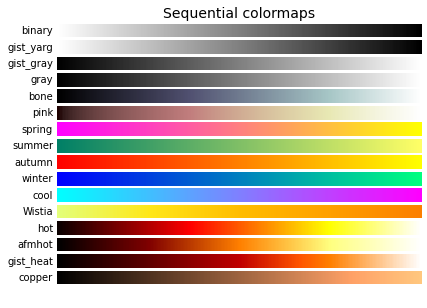

In [46]:
plot_color_gradients('Sequential',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])

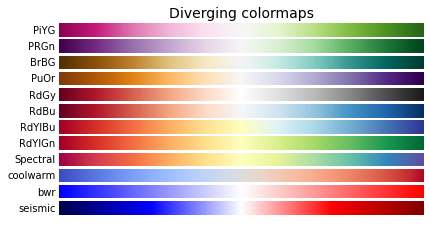

In [47]:
plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])

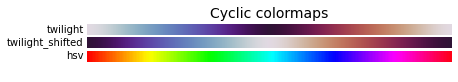

In [48]:
plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])

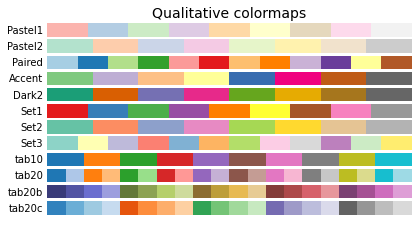

In [49]:
plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])

Reference: https://matplotlib.org/stable/tutorials/colors/colormaps.html

When giving matplotlib a series of numbers, it actually converts it to an array internally, without you knowing! 
Can pass arrays into `plt.plot()` etc!

The `plt.imshow()` function is another useful function in Matplotlib. It displays data as an image; i.e., on a 2D regular raster. This function is especially useful when working with images and matrices, as it provides a visual representation of the data.

* Plotting numbers similar to what we have in a raster data:
```python
arr = np.array([[1, 1, 5], [3, 3, 3], [1, 1, 5]])
plt.imshow(arr)
```
* The function also has optional `cmap=` argument to specify what colors to use;
* Also has optional `interpolation, vmin, vmax` arguments;
* Also has `plt.colorbar()` to create a “legend”; 

The example below is using matplotlib's imshow() function to create a visual representation of a 2D array:

We first create an 2D array with three rows and three columns, then create an image from the 2D array.<br>
The imshow() function maps the numerical values in the array to colors, following a specific colormap. By default, it uses the "viridis" colormap if no other is specified.<br>
- the `imshow` function will interpret the array values as grayscale intensities by default.
- In the viridis colormap, lower numbers are represented with a purple color, and higher numbers are represented with a yellow color. Therefore, in your array, the cells with the value 1 will be represented in purple, the cells with the value 3 will be represented with a color in between, and the cells with the value 5 will be represented in yellow.

This will display a 3x3 image where the color of each cell corresponds to the value of each element in the array. It's a quick and effective way to visualize 2D data.

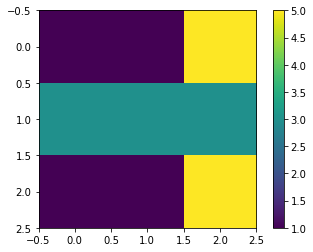

In [53]:
arr=np.array([[1, 1, 5],
       [3, 3, 3],
       [1, 1, 5]])
plt.imshow(arr)
plt.colorbar()  # Displays a color bar beside the image indicating the color scale

In this case, it's using the "winter" colormap.<br>
`plt.colorbar( )` adds a colorbar to the plot. The colorbar is a key that shows the relationship between the colors that are used in the image and the data values from the array. It helps interpret the colors in the context of the data. The colorbar will display a gradient from blue (representing lower numbers in your array) to green (representing higher numbers in your array).

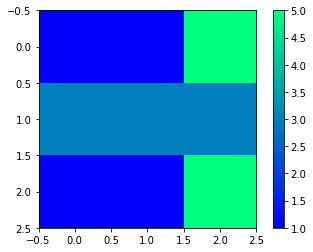

In [54]:
plt.imshow(arr, cmap = 'winter')
plt.colorbar()

The following examples use the "jet" colormap with difference shapes of NumPy arrays.

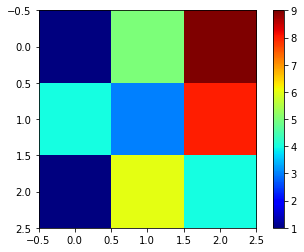

In [55]:
q2=np.array([[1, 5, 9],
       [4, 3, 8],
       [1, 6, 4]])
plt.imshow(q2, cmap = 'jet')
plt.colorbar()

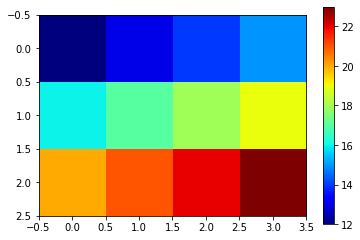

In [56]:
q = np.array(range(12,24)) # all in one row
q = q.reshape((3,4)) # divided into 3*4 dimension
plt.imshow(q, cmap = 'jet')
plt.colorbar()

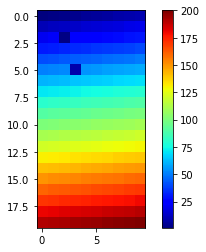

In [57]:
# increase the range
q = np.array(range(1,201)) # all in one row
q = q.reshape((20,10)) # divided into 20*10 dimension
q[2,2]= 2
q[5,3] =9
plt.imshow(q, cmap = 'jet')
plt.colorbar()

### 2.1 Importers & Exporters

There are other packages out there that can read directly from any raster format into a Numpy array. These are quite mature at this point and are both nice and easy to use!

### 2.2. GDAL: Geospatial Abstraction Library
* Open source, actively maintained/developed
* Less than helpful - non existent documentation
* Very handy. 

### 2.3 Rasterio Library
* Rasterio reads and writes geospatial raster datasets.
* Simple and plain and easy
* Rasterio employs GDAL under the hood for file I/O and raster formatting. 
* Its functions typically accept and return Numpy arrays. 

#### 2.3.1. Rasterio Basics

**How to open and copy a file to an array in memory:**
```python
with rasterio.open(file) as src:
    dem = src.read() # reads all bands!
    dem2 = src.read_band(1)  # reads first band - index starts at 1
```
* UsING the rasterio.open() function to open the raster file whose path is stored in the 'file' variable. 
* Using the 'with' operator/reserved word to ensure file is always closed when we are done!
* The read() method of a rasterio dataset reads data from all bands of the raster file and loads it into a NumPy array.
* This last line attempts to read only the first band of the raster file into a NumPy array. 

**How to open and write a file to an array in memory:**
```python
with rasterio.Env():
    with rasterio.open(newfilename, mode='w', **profile) as dst:
        dst.write(array, 1) # write out that new file to disk
```
* The first line establishes a rasterio environment. 
* Inside the rasterio environment, this "with" line opens a new file in write mode (mode='w'). The newfilename variable should contain the path to the file that you want to create. 
* The last line writes an array to the first band of the new file. 

In [59]:
# pip install geopandas

In [60]:
# Loading libraries
import rasterio
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas
import pandas
from rasterio.plot import show

The example below constructs a file path, opens a raster file at that path, reads the first band of data and the spatial metadata from the file, and then visualizes the data as an image with a colorbar.

In [62]:
# locating the data
l9 = r"l9_data_updated" # represents a directory name or path

# reading the data, and store the path in variable "DEM_CL"
DEM_CL = os.path.join(l9, "DEM_clip1.tif")

- r"string" tells the Python interpreter to treat the string as raw character: raw string, and stored in variable "l9"
- the os.path.join function combines the directory name stored in "l9" with the filename "DEM_clip1.tif" to create a complete file path.

In [63]:
# using rasterio to open the data
with rasterio.open(DEM_CL) as src: # the opened file refers to src within this block
    dem = src.read(1)  # reads the first band!
    profile = src.profile  # copies all the spatial info

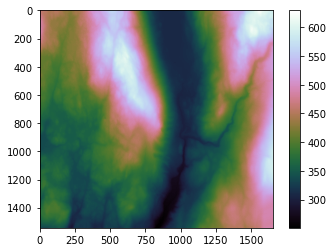

In [64]:
# plot to a figure: visualizing the data as a colour ramp
plt.imshow(dem, cmap='cubehelix')
plt.colorbar()  # add a color legend

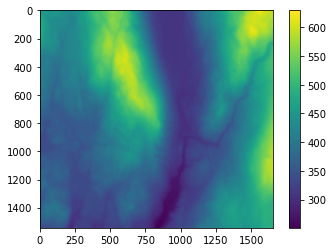

In [65]:
# plot to a figure: visualizing the data as a colour ramp
# used default colour
plt.imshow(dem)
plt.colorbar()  # add a color legend

#### 2.3.2 Data Property

Working with raster data using the rasterio library in Python, the `data.name` and `data.mode` attributes are used to access specific properties of an opened raster file.

`data.name`: This attribute returns the name of the raster file. If the raster file was opened using a file path, data.name would be that path. It can be a path to a file on your local system or a URL to a file on the internet, depending on how the file was opened.

`data.mode`: This attribute tells you the mode in which the file was opened. The mode indicates what operations can be performed on the file. In rasterio, 'r' stands for read-only mode, 'r+' for read-write mode, and 'w' for write mode.

* Name of the data: <code>data.name</code>
* Reading or writing mode of the data: <code>data.mode</code>

In [66]:
# Read and check some properties of data
sr = rasterio.open(r"l9_data_updated/DEM_clip1.tif")
print(sr) # priting the data location and reading mode
print("sr.name =",sr.name)  # name of the data
print("src.mode =",src.mode)  # checking the mode of the data

<open DatasetReader name='l9_data_updated/DEM_clip1.tif' mode='r'>
sr.name = l9_data_updated/DEM_clip1.tif
src.mode = r


#### 2.3.3. Reading All Bands and Plot

The code block below uses Python's os and rasterio libraries to read a multi-band raster file, constructs a path to a raster file, opens that file, reads all of its bands into a 3D NumPy array, and copies its metadata into a dictionary. Then dispplay the raster data.

In [69]:
# Spot_clip has 3 bands and reading all bands
SP_CL = os.path.join(l9, "SPOT_clip.tif")

with rasterio.open(SP_CL) as src:
    spot = src.read()  # reads all bands
    profile = src.profile  # copies all the spatial info

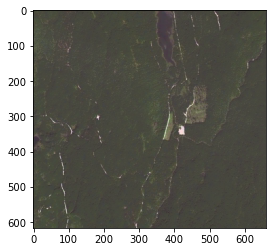

<AxesSubplot:>

In [70]:
show(spot)

#### 2.3.4. Plot Bands Separately

The Python codes below use the matplotlib library to create a figure with three subplots. <br>
Each subplot visualizes one band of the spot raster image using a different colormap ('Blues', 'Greens', and 'Reds'), and includes a colorbar as a legend.

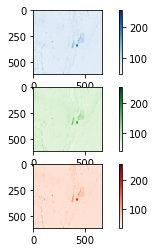

In [73]:
# plotting 3 bands separately
plt.subplot(3, 1, 1)
plt.imshow(spot[0], cmap='Blues')  # plot to a figure
plt.colorbar()  # add a color legend
plt.subplot(3, 1, 2)
plt.imshow(spot[1], cmap='Greens')  # plot to a figure
plt.colorbar()  # add a color legend
plt.subplot(3, 1, 3)
plt.imshow(spot[2], cmap='Reds')  # plot to a figure
plt.colorbar()  # add a color legend

Following site: https://stackoverflow.com/questions/28816046/displaying-different-images-with-actual-size-in-matplotlib-subplot

This code creates a figure with three subplots arranged **horizontally**. <br>
Each subplot visualizes a different band of the spot raster image using a different colormap ('Blues', 'Reds', and 'Greens'), and all the subplots share the **same x- and y-axis ranges and scales**.

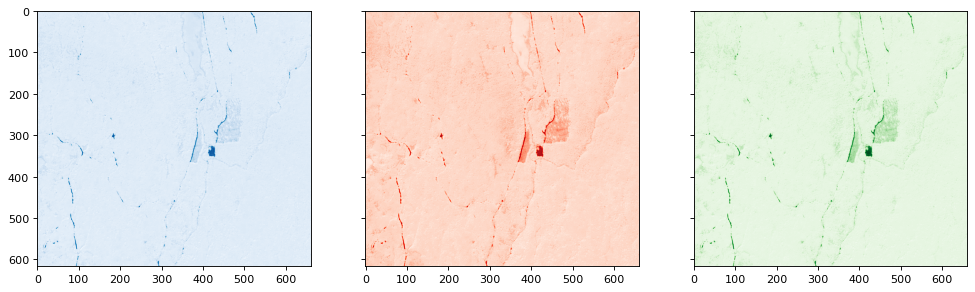

In [74]:
# plotting side-by-side
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), dpi=80, sharex=True, sharey=True)
ax[0].imshow(spot[2], cmap='Blues')
ax[1].imshow(spot[1], cmap='Reds')
ax[2].imshow(spot[0], cmap='Greens')

#### 2.3.5. Saving Bands in a Directory

The given block of code is using the rasterio library to save three bands of raster data into a new raster file.

In [75]:
# Saving bands in a directory
with rasterio.Env():  # shortcut to say use the tiff drivers to write the file
    with rasterio.open(r"l9_data_updated/DEM_clip1.tif",
                       mode='w', **profile) as dst:  # open a new file
        # btw, ** is a special shorthand for the reverse of a function called zip
        # zip will commbine two lists or dicts together and lock thier locations
        # reverse zip will "unzip" them and place them as arguments in a function call
        dst.write(spot[0], 1)  # write out that new file to disk
        dst.write(spot[1], 2)  # write out that new file to disk
        dst.write(spot[2], 3)  # write out that new file to disk
        # and by the end of the block it will close the file
dst = None  # remove object from memory

This code is similar to the previous one, but this time, it only writes one band (specifically the first band) from the spot raster data to a new TIFF file.

In [76]:
# Saving one band
with rasterio.Env():  # shortcut to say use the tiff drivers to write the file
    with rasterio.open(r"l9_data_updated\Spot_clip_out_band3.tiff",
                       mode='w', **profile) as dst:  # open a new file
        # btw, ** is a special shorthand for the reverse of a function called zip
        # zip will commbine two lists or dicts together and lock thier locations
        # reverse zip will "unzip" them and place them as arguments in a function call
        # it is not the most pythonic statement....

        dst.write(spot[0], 1)  # write out that new file to disk
        # and by the end of the block it will close the file

dst = None

## 3. Examples: Similar to Lab 6

In [77]:
l9 = r"l9_data_updated"

# make a list where we will store all of the masks
store1 = []
# make a second list to store all of the profiles (note that a dictionary may be more appropriate, but this works)
profiles_list = []

cb_path = os.path.join(l9, "cutBlocks2009.tif")
with rasterio.open(cb_path, 'r') as src:
    data = src.read()
    profile = src.profile  # let's save this profile to use for our final image
# hey look, it's already a perfectly good mask!
store1.append(data)

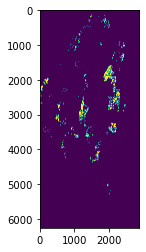

<AxesSubplot:>

In [78]:
# using rasterio to open the data
DEM_CL = os.path.join(l9, "dem.tif")
with rasterio.open(DEM_CL, 'r') as src:
    dem = src.read()  # reads the first band!
mask1 = (dem > 300)
mask2 = (dem < 700)
dem_1 = mask1 * mask2
store1.append(dem_1)
#show(store1)
# make the veg index mask
spot_path = os.path.join(l9, "Spot_data.tif")
with rasterio.open(spot_path, 'r') as src:
    data = src.read()

# calculate the vegetation index
data_1 = (data[0]+data[2])
data_2 = (data_1 > 1)
veg_index = data[1]*2.0/(data[0]+data[2])  # need to convert these from ints to floats! use 2.0 instead of 2
veg_mask1 = (veg_index >= 0.95)
veg_mask2 = (veg_index <= 1.05)
veg_mask = veg_mask1 * veg_mask2
# reshape so that it is a 3D array like the others
veg_mask = veg_mask[np.newaxis, :, :]
store1.append(veg_mask)

# combine all the masks into one final mask
final_mask = np.full_like(veg_mask, 1)  # arbitrary choice; could be any mask
for mask in store1:
    final_mask = final_mask * mask

# need to make sure that the profile that we are using (taken from cutblocks file) matches the data array
# profile['dtype'] is set to 'uint8', which matches our array
# let's remove the no-data value for giggles
profile['nodata'] = None
show(final_mask)
# save the output image

In [79]:
output_name = os.path.join(r"l9_data_updated/Area_selected11.tif")
with rasterio.open(output_name, 'w', **profile) as dst:
    dst.write(final_mask)

On the directory the saved image looks like a black color. You need to open it on Arcmap.

![area_selected.png](Week9_img/area_selected.png)

In [80]:
# Saving using a band here: same as above
with rasterio.Env():  # shortcut to say use the tiff drivers to write the file
    with rasterio.open(r"l9_data_updated/test.tiff",
                       mode='w', **profile) as dst:  # open a new file
        # btw, ** is a special shorthand for the reverse of a function called zip
        # zip will commbine two lists or dicts together and lock thier locations
        # reverse zip will "unzip" them and place them as arguments in a function call
        dst.write(final_mask[0],1)  # write out that new file to disk

## Solutions

(section-label-9.1)=
### Activity 1

In [81]:
b = np.ones([4,2])
print(b)
b[:,1] =5
print(b)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[1. 5.]
 [1. 5.]
 [1. 5.]
 [1. 5.]]


(section-label-9.2)=
### Activity 2

In [82]:
q = np.array(range(12,24)) # all in one row
print(q)
q = q.reshape((3,4)) # divided into 3*4 dimension
print(q)

[12 13 14 15 16 17 18 19 20 21 22 23]
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


(section-label-9.3)=
### Activity 3

In [83]:
# 1
p = np.ones((3, 3), dtype='int')
print("p=", p)
q = np.zeros((3, 3), dtype='int')
print("q=", q)
r = np.full((3, 3), 4, dtype='int')
print("r=", r)

#2 Add them all together
j = q+p+r
print("j=",j)

#3 Combine them into one array
f = np.array((p, q, r))
print("f=", f)
print("dim of f=", f.ndim)

p= [[1 1 1]
 [1 1 1]
 [1 1 1]]
q= [[0 0 0]
 [0 0 0]
 [0 0 0]]
r= [[4 4 4]
 [4 4 4]
 [4 4 4]]
j= [[5 5 5]
 [5 5 5]
 [5 5 5]]
f= [[[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[4 4 4]
  [4 4 4]
  [4 4 4]]]
dim of f= 3
